In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
#from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df = pd.read_csv(r"C:\Users\neele\OneDrive\Desktop\DATA ANALYTICS\New folder\Train-Set.csv")

In [8]:
df.head(50)

,FatContent,ProductVisibility,MRP,EstablishmentYear,OutletSales
0,Low Fat,0.016047,249.8092,1999,3735.1380
1,Regular,0.019278,48.2692,2009,443.4228
2,Low Fat,0.016760,141.6180,1999,2097.2700
3,Regular,0.000000,182.0950,1998,732.3800
4,Low Fat,0.000000,53.8614,1987,994.7052
5,Regular,0.000000,51.4008,2009,556.6088
6,Regular,0.012741,57.6588,1987,343.5528
7,Low Fat,0.127470,107.7622,1985,4022.7636
8,Regular,0.016687,96.9726,2002,1076.5986
9,Regular,0.094450,187.8214,2007,4710.5350


In [9]:
df['FatContent'] = df['FatContent'].replace({'Low Fat': '1'})
df['FatContent'] = df['FatContent'].replace({'Regular': '2'})
df['FatContent'] = df['FatContent'].replace({'LF': '3'})
df['FatContent'] = df['FatContent'].replace({'reg': '4'})
df['FatContent'] = df['FatContent'].replace({'low fat': '5'})
df.head(50)

,FatContent,ProductVisibility,MRP,EstablishmentYear,OutletSales
0,1,0.016047,249.8092,1999,3735.1380
1,2,0.019278,48.2692,2009,443.4228
2,1,0.016760,141.6180,1999,2097.2700
3,2,0.000000,182.0950,1998,732.3800
4,1,0.000000,53.8614,1987,994.7052
5,2,0.000000,51.4008,2009,556.6088
6,2,0.012741,57.6588,1987,343.5528
7,1,0.127470,107.7622,1985,4022.7636
8,2,0.016687,96.9726,2002,1076.5986
9,2,0.094450,187.8214,2007,4710.5350


In [10]:
y = df['OutletSales']
x = df.loc[:, df.columns != 'OutletSales']

In [11]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: OutletSales, dtype: float64

In [12]:
x.head()

,FatContent,ProductVisibility,MRP,EstablishmentYear
0,1,0.016047,249.8092,1999
1,2,0.019278,48.2692,2009
2,1,0.016760,141.6180,1999
3,2,0.000000,182.0950,1998
4,1,0.000000,53.8614,1987


In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
sales_pred = model.predict(X_test)

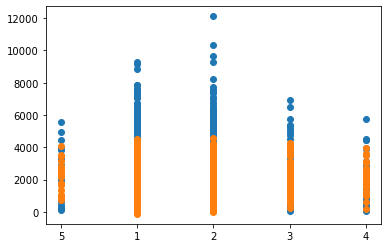

In [26]:
plt.scatter(X_test.iloc[:,0], y_test)
plt.scatter(X_test.iloc[:,0], sales_pred);#orange

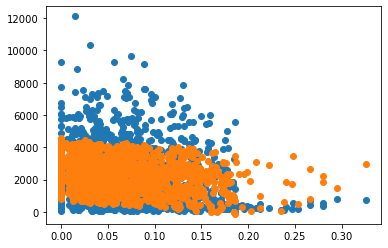

In [25]:
plt.scatter(X_test.iloc[:,1], y_test)
plt.scatter(X_test.iloc[:,1], sales_pred);#orange

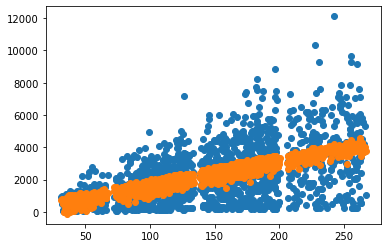

In [22]:
plt.scatter(X_test.iloc[:,2], y_test)
plt.scatter(X_test.iloc[:,2], sales_pred);

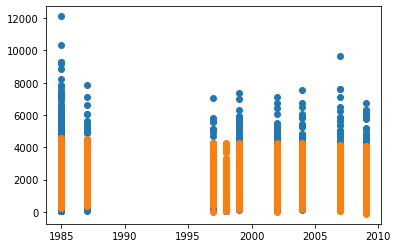

In [27]:
plt.scatter(X_test.iloc[:,3], y_test)
plt.scatter(X_test.iloc[:,3], sales_pred);#orange

In [ ]:
print('Coefficients: \n', model.coef_)

print('Intercept: \n', model.intercept_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, strength_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y_test, strength_pred))

In [ ]:
# y(sales) = 18.03910995(FatContent) - 4505.13183281(ProductVisibility) + 15.5517141(MRP) + -12.8091593(EstablishmentYear)